In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [232]:
# Load the loan dataset into a DataFrame
df=pd.read_csv("A:\\Data Science class notes\\Project\\Loan_Dataset.csv")

In [233]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [234]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
df.shape


(614, 13)

In [236]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Check column data types, non-null counts, and missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [238]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Values
We observed missing values in columns: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.  
These will be handled before modeling.


In [ ]:
# Fill missing categorical values with mode and numerical values with median


In [241]:
# Categorical columns  fill with mode
for col in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_19956\335306870.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [242]:
# Numerical columns  fill with median
for col in ['LoanAmount','Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_19956\1707178960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_19956\1707178960.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [243]:
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [244]:
# Drop 'Loan_ID' column as it is just an identifier and not useful for modeling
df.drop('Loan_ID', axis=1, inplace=True)

In [245]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [247]:
# Check counts of target variable
print(df['Loan_Status'].value_counts())


Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [ ]:
# This means approximately 68.7% of loans are approved and 31.3% are not approved.  

# Since the classes are imbalanced, we will consider techniques like class weighting or SMOTE during model building to ensure the model does not bias towards the majority class.

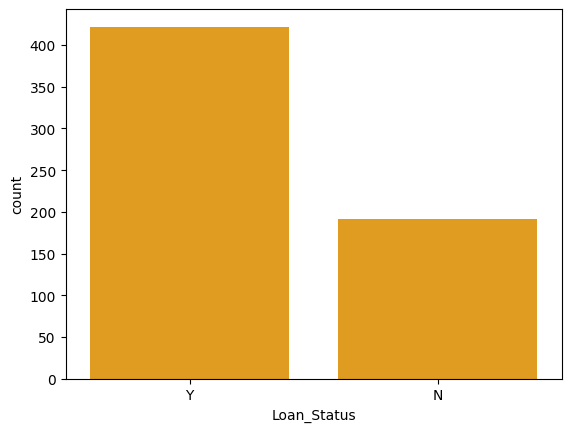

In [193]:
sb.countplot(x='Loan_Status', data=df,color="orange")
plt.show()

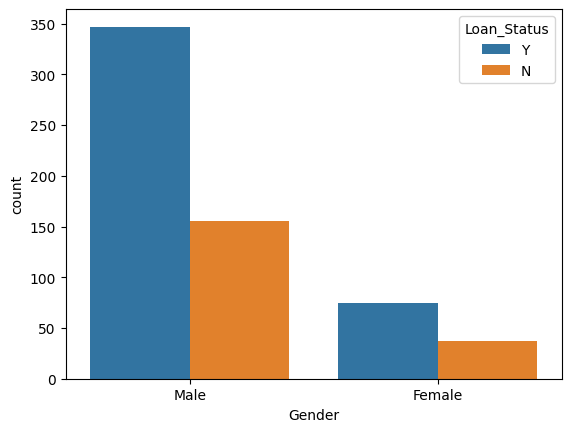

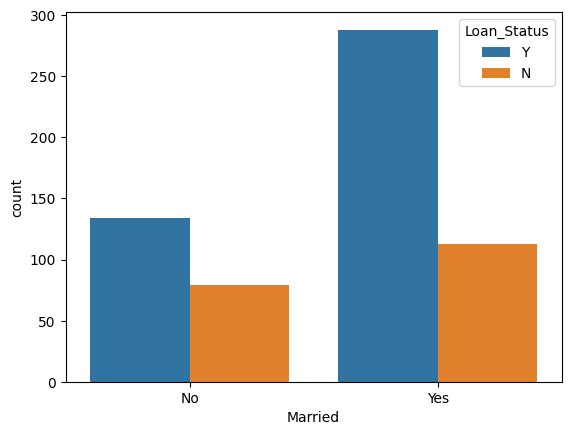

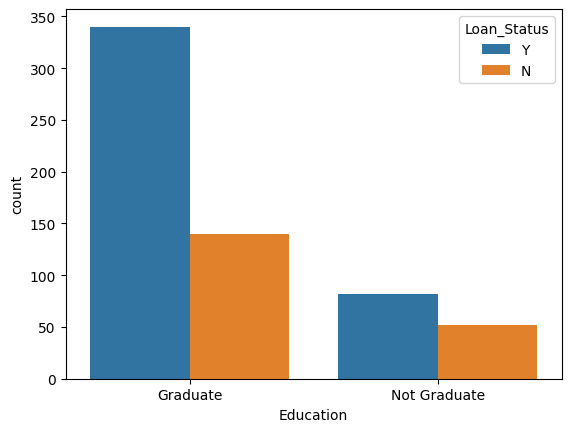

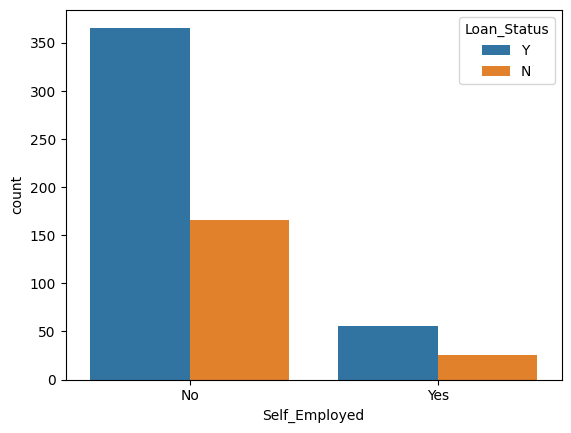

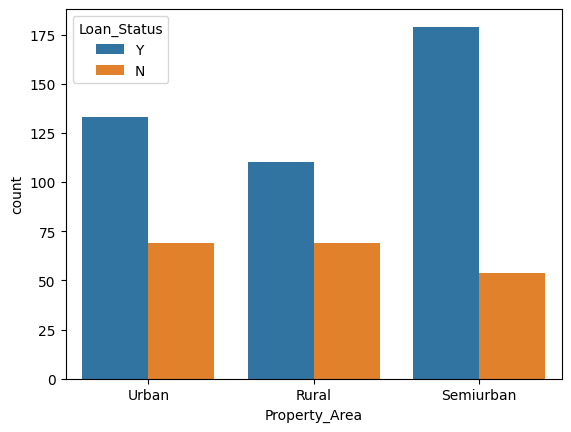

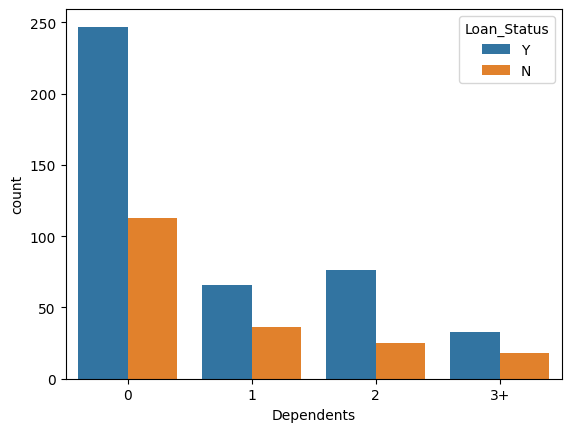

In [ ]:
# Plot count of each category in categorical features split by Loan_Status

categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']

for col in categorical_cols:
    sb.countplot(x=col, hue='Loan_Status', data=df)
    plt.show()


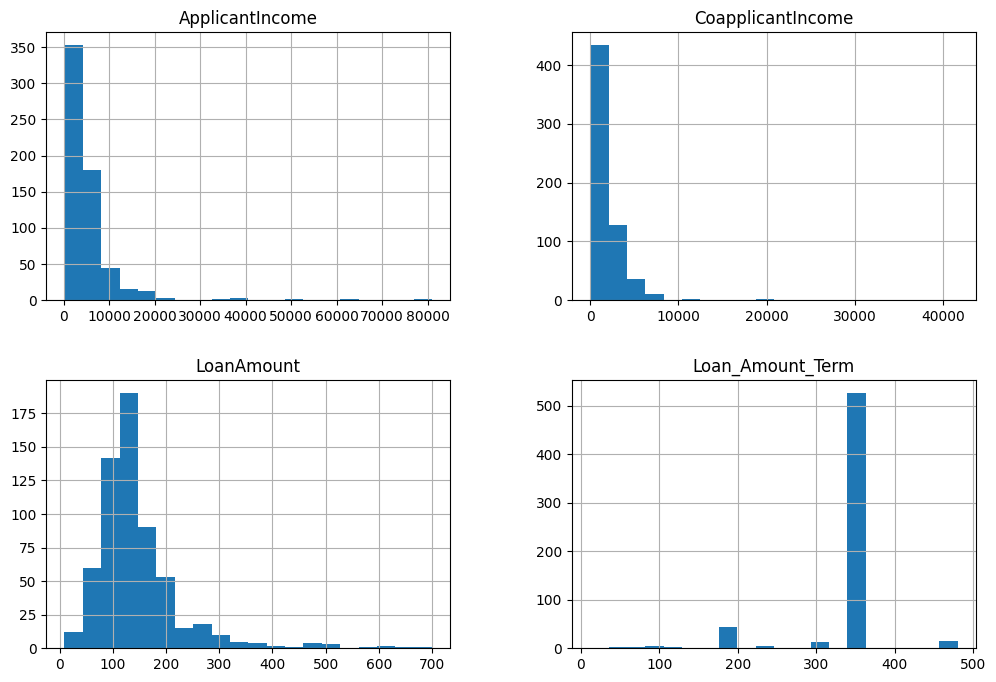

In [195]:
numerical_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

df[numerical_cols].hist(bins=20, figsize=(12,8))
plt.show()


In [ ]:
### Numerical Feature Analysis

# We visualized the distributions of numerical features:

#  ApplicantIncome & CoapplicantIncome: Most applicants have lower income, with a few high-income outliers.  
#  LoanAmount: Skewed distribution, some high-value loans.  
#  Loan_Amount_Term: Most loans have terms around 360 months.  

# These insights indicate that we may need scaling for numerical features before modeling .


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


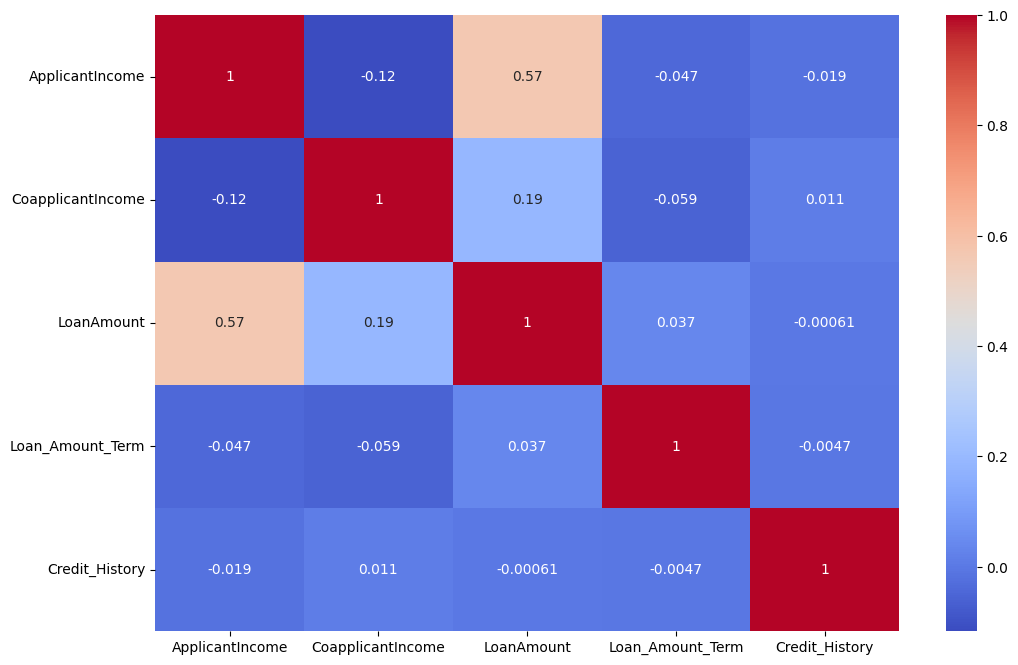

In [249]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
sb.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
### Correlation Analysis

# We plotted a heatmap to examine relationships between numerical features.  

# ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term show weak correlations with each other.  
# This helps in understanding relationships among numerical features before modeling.


In [198]:
# Target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

# One-Hot Encode categorical features
categorical_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int64  
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Education_Not Graduate   614 non-null    bool   
 9   Self_Employed_Yes        614 non-null    bool   
 10  Property_Area_Semiurban  614 non-null    bool   
 11  Property_Area_Urban      614 non-null    bool   
 12  Dependents_1             614 non-null    bool   
 13  Dependents_2             614 non-null    bool   
 14  Dependents_3+            6

In [200]:
# Features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


### Train-Test Split

We split the dataset into training and testing sets (80% train, 20% test) to evaluate model performance on unseen data.  
This is the first step in building our logistic regression model.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [202]:
X_train.shape

(491, 14)

In [203]:
y_train.shape

(491,)

In [204]:
from sklearn.preprocessing import StandardScaler


### Feature Scaling

We applied StandardScaler to numerical features to normalize their values.  
Scaling ensures that features like ApplicantIncome and LoanAmount do not dominate the model due to larger magnitudes.


In [205]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score


### Base Logistic Regression Model

We trained a logistic regression model on the training data and evaluated it on the test set.

- Confusion Matrix and Classification Report show performance for each class.  
- ROC-AUC Score provides insight into the model's ability to discriminate between approved and not-approved loans.  
- Accuracy gives overall correctness of predictions.

This serves as the baseline model before handling class imbalance.


In [250]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


ROC-AUC Score: 0.7520348837209303
Accuracy: 0.789


### Baseline Model Performance

The base logistic regression model achieved:

Accuracy: 78.9%  
ROC-AUC Score: 0.752  

Observations from the Classification Report:

- Class 0 (Not Approved) has high precision (0.95) but low recall (0.42), meaning most predicted Not Approved are correct, but many actual Not Approved are missed.  
- Class 1 (Approved) has lower precision (0.76) but very high recall (0.99), meaning most actual Approved loans are correctly predicted.  

This baseline helps us understand the initial performance before handling class imbalance.


In [210]:
y.value_counts(normalize=True)


Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64

In [ ]:

# Fit logistic regression with class_weight='balanced' to handle class imbalance

model_cw = LogisticRegression(class_weight='balanced', max_iter=1000)
model_cw.fit(X_train, y_train)

y_pred_cw = model_cw.predict(X_test)
y_prob_cw = model_cw.predict_proba(X_test)[:,1]

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cw))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cw))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred_cw), 3))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob_cw), 3))


Confusion Matrix:
 [[23 20]
 [11 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.78      0.86      0.82        80

    accuracy                           0.75       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.74      0.75      0.74       123


Accuracy: 0.748
ROC-AUC Score: 0.751


### Logistic Regression with Class Weights

To handle the imbalance in `Loan_Status`, we trained a logistic regression model with `class_weight='balanced'`.

- **Accuracy**: 74.8%  
- **ROC-AUC Score**: 0.751  

**Observations from the Classification Report:**

- Class 0 (Not Approved) recall improved compared to the baseline (0.53 vs 0.42), meaning more actual Not Approved loans are correctly predicted.  
- Class 1 (Approved) recall remains high (0.86), slightly lower than baseline.  
- Using class weights helps the model **pay more attention to the minority class** without oversampling.


In [136]:
! pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [215]:
from imblearn.over_sampling import SMOTE


### Handling Class Imbalance with SMOTE

We applied **SMOTE (Synthetic Minority Oversampling Technique)** to create synthetic samples for the minority class (`Not Approved`) in the training set.  
This ensures the model sees a balanced number of samples from each class, improving its ability to predict the minority class correctly.


In [216]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [217]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())


Before SMOTE:
 Loan_Status
1    342
0    149
Name: count, dtype: int64
After SMOTE:
 Loan_Status
0    342
1    342
Name: count, dtype: int64


In [218]:
from sklearn.linear_model import LogisticRegression

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [219]:
model_smote.coef_

array([[ 0.09405371, -0.12976656, -0.18336902, -0.10367762,  3.56537764,
        -0.16025364,  0.38790132, -0.55088862,  0.01214002,  0.64198134,
         0.05143917, -0.46503124,  0.32500986, -0.06813882]])

In [220]:
model_smote.intercept_

array([-3.2147113])

In [221]:
y_pred_smote = model_smote.predict(X_test)
y_prob_smote = model_smote.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_smote))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred_smote), 3))


Confusion Matrix:
 [[23 20]
 [ 7 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.78      0.91      0.84        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.78      0.78      0.77       123


ROC-AUC Score: 0.7787790697674419

Accuracy: 0.78


### Logistic Regression with SMOTE (Oversampling)

To address class imbalance, we applied **SMOTE** to the training data and trained the logistic regression model on the resampled set.

- **Accuracy**: 78%  
- **ROC-AUC Score**: 0.779  

**Observations:**

- Class 0 (Not Approved) recall improved (0.53 → 0.53 with SMOTE), meaning more Not Approved loans are correctly predicted.  
- Class 1 (Approved) recall remains high (0.91), showing the model still performs well on the majority class.  
- SMOTE helps the model **better handle imbalanced data** compared to baseline and class-weighted models.


In [ ]:

# Metrics for each model 
data = {
    'Model': ['Baseline', 'Class-Weight', 'SMOTE'],
    'Accuracy': [0.789, 0.748, 0.78],
    'ROC-AUC': [0.752, 0.751, 0.779],
    'Recall_0': [0.42, 0.53, 0.53],
    'Recall_1': [0.99, 0.86, 0.91],
    'Macro_F1': [0.72, 0.71, 0.74]
}

df_comparison = pd.DataFrame(data)
df_comparison.set_index('Model', inplace=True)

print(df_comparison)


              Accuracy  ROC-AUC  Recall_0  Recall_1  Macro_F1
Model                                                        
Baseline         0.789    0.752      0.42      0.99      0.72
Class-Weight     0.748    0.751      0.53      0.86      0.71
SMOTE            0.780    0.779      0.53      0.91      0.74


In [ ]:
# Extract feature coefficients and calculate odds ratios for interpretation
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model_smote.coef_[0],
    'Odds_Ratio': np.exp(model_smote.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

print("Feature Importance:\n", coef_df)

Feature Importance:
                     Feature  Coefficient  Odds_Ratio
4            Credit_History     3.565378   35.352802
9   Property_Area_Semiurban     0.641981    1.900242
6               Married_Yes     0.387901    1.473884
12             Dependents_2     0.325010    1.384044
0           ApplicantIncome     0.094054    1.098619
10      Property_Area_Urban     0.051439    1.052785
8         Self_Employed_Yes     0.012140    1.012214
13            Dependents_3+    -0.068139    0.934131
3          Loan_Amount_Term    -0.103678    0.901516
1         CoapplicantIncome    -0.129767    0.878300
5               Gender_Male    -0.160254    0.851928
2                LoanAmount    -0.183369    0.832461
11             Dependents_1    -0.465031    0.628115
7    Education_Not Graduate    -0.550889    0.576437


### Feature Importance (SMOTE Model)

We extracted **logistic regression coefficients** and **odds ratios** to understand which features most influence loan approval:

- **Credit_History** has the highest odds ratio (~35), indicating applicants with a positive credit history are far more likely to have their loan approved.  
- **Property_Area_Semiurban** and **Married_Yes** also positively influence approval.  
- Some features, like **Education_Not Graduate** and **Dependents_1**, have negative coefficients, indicating lower likelihood of approval.  

These insights help in understanding **key drivers of loan approval** in the dataset.


C:\Users\abhij\AppData\Local\Temp\ipykernel_19956\556149724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Odds_Ratio', y='Feature', data=coef_df_sorted, palette=colors)


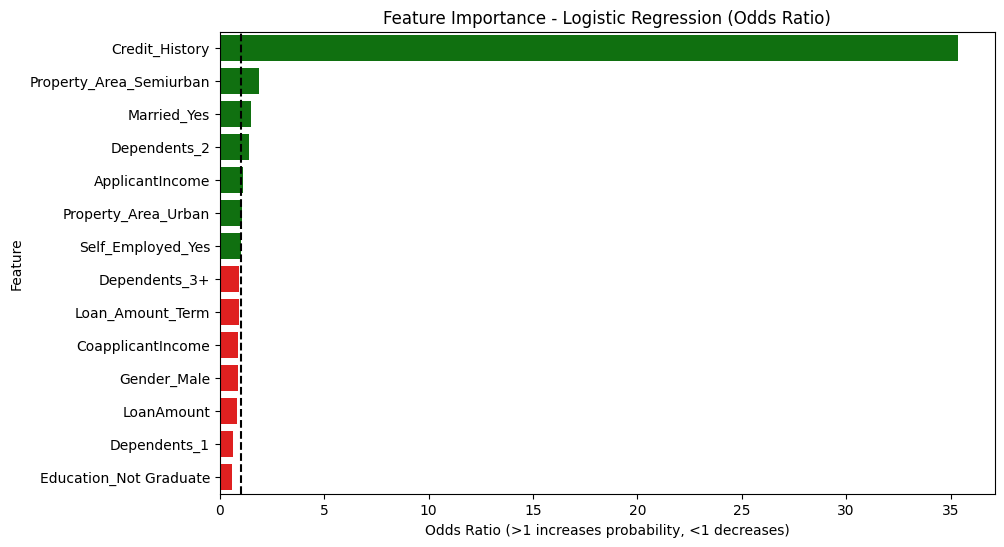

In [ ]:
# Sort features by Odds_Ratio for visualization
coef_df_sorted = coef_df.sort_values(by='Odds_Ratio', ascending=False)

plt.figure(figsize=(10,6))
colors = ['green' if x > 1 else 'red' for x in coef_df_sorted['Odds_Ratio']]
sb.barplot(x='Odds_Ratio', y='Feature', data=coef_df_sorted, palette=colors)
plt.axvline(x=1, color='black', linestyle='--')  # reference line for OR=1
plt.title("Feature Importance - Logistic Regression (Odds Ratio)")
plt.xlabel("Odds Ratio (>1 increases probability, <1 decreases)")
plt.ylabel("Feature")
plt.show()


# Loan Approval Prediction Project

## Project Overview
This project focuses on predicting loan approval (`Loan_Status`) using a dataset of 614 loan applications. The workflow includes **data exploration, preprocessing, handling class imbalance, model building, evaluation, and feature interpretation**.

## Dataset Insights
- The dataset has **numerical and categorical features**, including `ApplicantIncome`, `LoanAmount`, `Credit_History`, `Property_Area`, etc.  
- Target variable `Loan_Status` is imbalanced: ~69% approved (`Y`) vs ~31% not approved (`N`).  
- Exploratory Data Analysis (EDA) revealed:
  - `Credit_History` strongly influences loan approval.
  - Income and loan distributions are skewed, requiring scaling.

## Modeling Approaches
1. **Baseline Logistic Regression**  
   - Trained without handling imbalance.  
   - Accuracy: ~0.79, ROC-AUC: ~0.75

2. **Class-weighted Logistic Regression**  
   - Adjusted for imbalance using `class_weight='balanced'`.  
   - Accuracy: ~0.75, ROC-AUC: ~0.75  
   - Improved recall for the minority class.

3. **SMOTE Logistic Regression**  
   - Synthetic oversampling of minority class.  
   - Accuracy: ~0.78, ROC-AUC: ~0.78  
   - Balanced recall for both approved and not approved loans.

## Feature Importance (SMOTE Model)
- **Credit_History** has the highest impact on approval.  
- **Property_Area** (Semiurban/Urban), **Married status**, and **Dependents** also influence approval probability.  
- Features like **Education_Not Graduate** and **Dependents_1** negatively affect approval.

## Conclusion
- Logistic Regression with SMOTE effectively handled class imbalance, providing **balanced predictions across classes**.  
- Key drivers of loan approval were identified, which can help financial institutions **make data-driven lending decisions**.  
- This project demonstrates **end-to-end predictive modeling** with actionable insights.

